In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mycharger Bulletien_updated.csv to Mycharger Bulletien_updated.csv


In [2]:
!pip install pytorch-ignite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 264 kB 4.0 MB/s 


In [3]:
!pip install rouge


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Libraries Import**

In [4]:
import pandas as pd
import numpy as np
import os
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Data Reading**

In [6]:
# read data from the csv file (from the location it is stored)
Data = pd.read_csv('Mycharger Bulletien_updated.csv',encoding='cp1252')
Data = Data.astype(str)
rows, columns = Data.shape

In [7]:
Data

,headline,text
0,Board of Governors announces University of New...,The University of New Haven Board of Governors...
1,"Justine Bernard, 19, University of New Haven p...",University of New Haven psychology major Justi...
2,"After a long year, graduation is here and in p...","On May 17, the University of New Haven will ho..."
3,Labor rights demonstration forms outside of Un...,"On Thursday, a group of roughly 25 former clea..."
4,"The university’s Justice, Equity, Diversity & ...",The student body asked for promotion of divers...
...,...,...
94,“Squid Game” season 2 confirmed,“Squid Game” has been Netflix’s hit original s...
95,Agatha’s big break is coming with “WandaVision...,"On Oct. 7, Marvel revealed their plans to give..."
96,“Scream” series returns,"In December 1996, Ghostface was introduced as ..."
97,3 true-crime documentaries to watch this spook...,As the leaves change and the weather becomes c...


**Cleaning** **the** **dataset**

In [8]:
df=Data[Data['text'].isnull()==False]
df=Data[Data['headline'].isnull()==False]
df=df[df['text']!='nan']

df.drop_duplicates(subset=['text'],inplace=True)  #dropping duplicates

In [9]:
df

,headline,text
0,Board of Governors announces University of New...,The University of New Haven Board of Governors...
1,"Justine Bernard, 19, University of New Haven p...",University of New Haven psychology major Justi...
2,"After a long year, graduation is here and in p...","On May 17, the University of New Haven will ho..."
3,Labor rights demonstration forms outside of Un...,"On Thursday, a group of roughly 25 former clea..."
4,"The university’s Justice, Equity, Diversity & ...",The student body asked for promotion of divers...
...,...,...
94,“Squid Game” season 2 confirmed,“Squid Game” has been Netflix’s hit original s...
95,Agatha’s big break is coming with “WandaVision...,"On Oct. 7, Marvel revealed their plans to give..."
96,“Scream” series returns,"In December 1996, Ghostface was introduced as ..."
97,3 true-crime documentaries to watch this spook...,As the leaves change and the weather becomes c...


In [10]:
stop_words = set(stopwords.words('english')) 

def text_cleaner(text,num):
  str = text.lower()
  str = BeautifulSoup(str, "lxml").text
  str = re.sub(r'\([^)]*\)', '', str)
  str = re.sub('"','', str)
  str = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in str.split(" ")])    
  str = re.sub(r"'s\b","",str)
  str = re.sub("[^a-zA-Z]", " ", str) 
  str = re.sub('[m]{2,}', 'mm', str)
  if(num==0):
    str = re.sub(r'\.',' . ',str)
  if(num==0):
      tokens = [w for w in str.split() if not w in stop_words]
      
  else:
      tokens=str.split()
  long_words=[]
  for i in tokens:
      if len(i)>1:                                                 #removing short words
          long_words.append(i)
  return (" ".join(long_words)).strip()

In [11]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not","didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not","he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is","I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would","i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would","it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam","mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have","mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have","she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is","should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as","this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would","there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have","they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have","wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are","we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are","what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is","where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have","why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have","would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have","you're": "you are", "you've": "you have"}

In [12]:
#call the function
clean_text = []
for t in df['text']:
    clean_text.append(text_cleaner(t,0))

In [13]:
#call the function
clean_summary = []
for t in df['headline']:
    clean_summary.append(text_cleaner(t,0))

In [14]:
df['text']=clean_text
df['headline']=clean_summary

df.replace('', np.nan, inplace=True)
df.dropna(axis=0,inplace=True)

Updating the df

In [15]:
df

,headline,text
0,board governors announces university new trans...,university new board governors unanimously app...
1,justine bernard university new psychology majo...,university new psychology major justine bernar...
2,long year graduation person,may university new host spring commencement ce...
3,labor rights demonstration forms outside unive...,thursday group roughly former cleaning service...
4,university justice equity diversity inclusion ...,student body asked promotion diversity inclusi...
...,...,...
94,squid game season confirmed,squid game netflix hit original show since cam...
95,agatha big break coming wandavision spinoff,oct marvel revealed plans give kathryn hahn wa...
96,scream series returns,december ghostface introduced serial killer at...
97,true crime documentaries watch spooky season,leaves change weather becomes colder everyone ...


**Analyzing the sequence distribution**

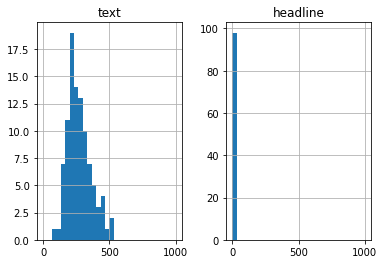

In [16]:
import matplotlib.pyplot as plt
text_word_count = []
headline_word_count = []

# populate the lists with sentence lengths
for i in df['text']:
      temp=i.split()
      text_word_count.append(len(temp))

for j in df['headline']:
  #print(j)
  temp1=j.split()
  headline_word_count.append(len(temp1))

length_df = pd.DataFrame({'text':text_word_count, 'headline':headline_word_count})
length_df.hist(bins = 30,range=[0,1000])
plt.show()

In [17]:
# From the graph
# We can fix maximum length of text = 150 since most of the reviews have a length of 150 and maximum headline length of 50, since maximum headlines are of size 40

max_len_text= 500
max_len_headline=50

In [18]:
cnt=0
for i in df['text']:
    if(len(i.split())<=150):
        cnt=cnt+1
print(cnt/len(df['text']))

0.030612244897959183


**Selecting text and headlines below the maximum lengths**

In [19]:
text1 =np.array(df['text'])
headline1=np.array(df['headline'])

short_text=[]
short_summary=[]

for i in range(len(text1)):
    if(len(headline1[i].split())<=50 and len(text1[i].split())<=500):
        short_text.append(text1[i])
        short_summary.append(headline1[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [20]:
# Validating the lengths

text1 =np.array(df['text'])
headline1=np.array(df['summary'])


for i in range(len(text1)):
    if(len(headline1[i].split())>=150):
      print(i)


In [21]:
df

,text,summary
0,university new board governors unanimously app...,board governors announces university new trans...
1,university new psychology major justine bernar...,justine bernard university new psychology majo...
2,may university new host spring commencement ce...,long year graduation person
3,thursday group roughly former cleaning service...,labor rights demonstration forms outside unive...
4,student body asked promotion diversity inclusi...,university justice equity diversity inclusion ...
...,...,...
91,squid game netflix hit original show since cam...,squid game season confirmed
92,oct marvel revealed plans give kathryn hahn wa...,agatha big break coming wandavision spinoff
93,december ghostface introduced serial killer at...,scream series returns
94,leaves change weather becomes colder everyone ...,true crime documentaries watch spooky season


In [22]:
print(df['text'][1],df['summary'][1],sep='\n')

university new psychology major justine bernard died morning june shooting downtown atlanta apartment ms bernard matawan member class psychology student focused criminal justice field forensic psychology last semester made university dean list ms bernard active campus community interested diversity issues police report incident occurred downtown atlanta around ms bernard driven hospital later died cbs said nyasia reeves detained atlanta homicide investigators reeves described acquaintance ms bernard news shared university community via email dean students ophelie rowe allen rowe allen said please join extending heartfelt condolences justine parents family friends classmates let us commit honoring memory life lost much soon steven kaplan university president said heart breaks justine parents family friends professors senseless horrific act violence alex betro high school classmate ms bernard junior electrical engineering major university new described friend bubbly outgoing well known h

**Splitting data into train, test  --  70 - 30**

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['summary'],test_size=0.3,random_state=0,shuffle=True) 

In [24]:
print(len(x_train))
print(len(x_test))

67
29


**Language Translation**

In [25]:
#from torchtext.data import Field, BucketIterator

In [26]:
#pip install spacy
#!python -m spacy download en

In [27]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

**Creating Vocabluray**

In [28]:
SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [29]:
def readLangs(text, summary, reverse=False):
    print("Reading lines...")
    
    # Split every line into pairs and normalize
    text=np.array(text)
    summary=np.array(summary)
    pairs = [[text[i],summary[i]] for i in range(len(text))]

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(summary)
        output_lang = Lang(text)
    else:
        input_lang = Lang(text)
        output_lang = Lang(summary)

    return input_lang, output_lang, pairs

**Sentence Normalizing**

In [30]:
def normalize_sentence(df, lang):
   sentence = df[lang].str.lower()
   sentence = sentence.str.replace('[^A-Za-z\s]+', '')
   sentence = sentence.str.normalize('NFD')
   sentence = sentence.str.encode('ascii', errors='ignore').str.decode('utf-8')
   return sentence

def read_sentence(df, lang1, lang2):
   sentence1 = normalize_sentence(df, lang1)
   sentence2 = normalize_sentence(df, lang2)
   return sentence1, sentence2

def read_file(loc, lang1, lang2):
   df = pd.read_csv(loc, delimiter='\t', header=None, names=[lang1, lang2])
   return df

def process_data(lang1,lang2):
   df = read_file('text/%s-%s.txt' % (lang1, lang2), lang1, lang2)
   print("Read %s sentence pairs" % len(df))
   sentence1, sentence2 = read_sentence(df, lang1, lang2)

   source = Lang()
   target = Lang()
   pairs = []
   for i in range(len(df)):
       if len(sentence1[i].split(' ')) < MAX_LENGTH and len(sentence2[i].split(' ')) < MAX_LENGTH:
           full = [sentence1[i], sentence2[i]]
           source.addSentence(sentence1[i])
           target.addSentence(sentence2[i])
           pairs.append(full)

   return source, target, pairs

**Data Preparatiom**

In [31]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name,"--------------------", input_lang.n_words)
    #print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs

In [32]:
input_lang, output_lang, pairs = prepareData(x_train, y_train , False)


Reading lines...
Read 67 sentence pairs
Counting words...
Counted words:
['highly controversial russian referendums began ukraine friday aim showcasing called public support annexation ukrainian territory russian federation voting occurring regions luhansk donetsk zaporizhzhia kherson partially controlled russia moment russian news outlets confirmed voting conducted door door system cases short term notice announcement left little time build key voting infrastructure residents handed paper ballots authorities fill homes ninel lysenko originally donetsk similar vote occurred fleeing melitopol said saw staged mean come home vote guns referendums illegal ukrainian law international law well referendums meet basic democratic standards free fair elections therefore seen fraudulent many result likely fall moscow favor global leaders denounced process president joseph biden saying referendums sham time referendums could still open door kremlin officially annex regions expanding russia borders

In [33]:
pairs[1]

['countless famous artists performed super bowl halftime show years year event featured legendary performers dr dre mary blige snoop dogg eminem kendrick lamar five performers nearly grammy awards among golden gramophones collection snoop dogg grammy nominations california born rapper become household name last three decades thanks songs like gin juice drop like hot special distinction comes grammy awards snoop received grammy award nominations work years never grammy received first nomination best rap performance nuthin thang recent nomination featured artist kendrick lamar pimp butterfly released eminem grammy awards eminem game quite long fellow super bowl performers detroit born rapper holds grammy awards name date lose rapper earned grammy awards since turn century eminem first two grammy awards best rap solo performance best rap album nd grammy awards kendrick lamar grammy awards kendrick lamar american rapper received awards nominations including grammys six billboard music awar

In [34]:
#---- Deep Model

**Converting word to Index then index to word**

In [35]:
SOS_token = 0
EOS_token = 1

In [36]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)

def tensorsFromPair(input_lang,output_lang,pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [37]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

**Encoder Model and Decoder Model**

In [38]:
class Encoder(nn.Module):
   def __init__(self, input_dim, hidden_dim, embbed_dim, num_layers):
       super(Encoder, self).__init__()
      
       #set the encoder input dimesion , embbed dimesion, hidden dimesion, and number of layers 
       self.input_dim = input_dim
       self.embbed_dim = embbed_dim
       self.hidden_dim = hidden_dim
       self.num_layers = num_layers

       #initialize the embedding layer with input and embbed dimention
       self.embedding = nn.Embedding(input_dim, self.embbed_dim)
      #change

       #intialize the GRU to take the input dimetion of embbed, and output dimention of hidden and
       #set the number of gru layers
       self.gru = nn.GRU(self.embbed_dim, self.hidden_dim, num_layers=self.num_layers)
   def forward(self, src):
      
       embedded = self.embedding(src).view(1,1,-1)
       outputs, hidden = self.gru(embedded)
       return outputs, hidden

class Decoder(nn.Module):
   def __init__(self, output_dim, hidden_dim, embbed_dim, num_layers):
       super(Decoder, self).__init__()

#set the encoder output dimension, embed dimension, hidden dimension, and number of layers 
       self.embbed_dim = embbed_dim
       self.hidden_dim = hidden_dim
       self.output_dim = output_dim
       self.num_layers = num_layers

# initialize every layer with the appropriate dimension. For the decoder layer, it will consist of an embedding, GRU, a Linear layer and a Log softmax activation function.
       self.embedding = nn.Embedding(output_dim, self.embbed_dim)
       self.gru = nn.GRU(self.embbed_dim, self.hidden_dim, num_layers=self.num_layers)
       self.out = nn.Linear(self.hidden_dim, output_dim)
       self.softmax = nn.LogSoftmax(dim=1)
      
   def forward(self, input, hidden):

# reshape the input to (1, batch_size)
       input = input.view(1, -1)
       embedded = F.relu(self.embedding(input))
       output, hidden = self.gru(embedded, hidden)       
       prediction = self.softmax(self.out(output[0]))
      
       return prediction, hidden


In [39]:
MAX_LENGTH = 300

**Define Model**

In [40]:
class Seq2Seq(nn.Module):
   def __init__(self, encoder, decoder, device, MAX_LENGTH=MAX_LENGTH):
       super().__init__()
      
#initialize the encoder and decoder
       self.encoder = encoder
       self.decoder = decoder
       self.device = device
     
   def forward(self, source, target, teacher_forcing_ratio=0.5):

       input_length = source.size(0) #get the input length (number of words in sentence)
       batch_size = target.shape[1] 
       target_length = target.shape[0]
       vocab_size = self.decoder.output_dim
      
#initialize a variable to hold the predicted outputs
       outputs = torch.zeros(target_length, batch_size, vocab_size).to(self.device)

#encode every word in a sentence
       for i in range(input_length):
           encoder_output, encoder_hidden = self.encoder(source[i])

#use the encoder’s hidden layer as the decoder hidden
       decoder_hidden = encoder_hidden.to(device)
  
#add a token before the first predicted word
       decoder_input = torch.tensor([SOS_token], device=device)  # SOS

#topk is used to get the top K value over a list
#predict the output word from the current target word. If we enable the teaching force,  then the #next decoder input is the next word, else, use the decoder output highest value. 

       for t in range(target_length):   
           decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
           outputs[t] = decoder_output
           teacher_force = random.random() < teacher_forcing_ratio
           topv, topi = decoder_output.topk(1)
           input = (target[t] if teacher_force else topi)
           if(teacher_force == False and input.item() == EOS_token):
               break

       return outputs

**Function to train Model**

In [41]:
teacher_forcing_ratio = 0.5

def clacModel(model, input_tensor, target_tensor, model_optimizer, criterion):
   model_optimizer.zero_grad()

   input_length = input_tensor.size(0)
   loss = 0
   epoch_loss = 0
   # print(input_tensor.shape)

   output = model(input_tensor, target_tensor)

   num_iter = output.size(0)
   print(num_iter)

#calculate the loss from a predicted sentence with the expected result
   for ot in range(num_iter):
       loss += criterion(output[ot], target_tensor[ot])

   loss.backward()
   model_optimizer.step()
   epoch_loss = loss.item() / num_iter

   return epoch_loss

def trainModel(model, source, target, pairs, num_iteration=20000):
   model.train()

   optimizer = optim.SGD(model.parameters(), lr=0.01)
   criterion = nn.NLLLoss()
   total_loss_iterations = 0

   training_pairs = [tensorsFromPair(source, target, random.choice(pairs))
                     for i in range(num_iteration)]
  
   for iter in range(1, num_iteration+1):
       training_pair = training_pairs[iter - 1]
       input_tensor = training_pair[0]
       target_tensor = training_pair[1]

       loss = clacModel(model, input_tensor, target_tensor, optimizer, criterion)

       total_loss_iterations += loss

       if iter % 5000 == 0:
           avarage_loss= total_loss_iterations / 5000
           total_loss_iterations = 0
           print('%d %.4f' % (iter, avarage_loss))
          
   torch.save(model.state_dict(), 'mytraining.pt')
   return model


**Evaluation matrix**

In [42]:
MAX_LENGTH=200

In [43]:
def evaluate(model, input_lang, output_lang, sentences, max_length=MAX_LENGTH):
   with torch.no_grad():
       input_tensor = tensorFromSentence(input_lang, sentences[0])
       output_tensor = tensorFromSentence(output_lang, sentences[1])
  
       decoded_words = []
  
       output = model(input_tensor, output_tensor)
       # print(output_tensor)
  
       for ot in range(output.size(0)):
           topv, topi = output[ot].topk(1)
           # print(topi)

           if topi[0].item() == EOS_token:
               decoded_words.append('<EOS>')
               break
           else:
               decoded_words.append(output_lang.index2word[topi[0].item()])
   return decoded_words
def evaluateRandomly(model, source, target, pairs, n=10):
   for i in range(n):
       output_sentence=""
       pair = random.choice(pairs)
       text = pair[0]
       summary = pair[1]
       output_words = evaluate(model, source, target, pair)
       output_sentence = ' '.join(output_words)
       print("Summary is:  ", pair[1])
       print("Predicted Summary is:",output_sentence)
       score = calculate_rogue(pair[1], output_sentence)
       print(score)


In [44]:
for i in range(2):
       pair = random.choice(pairs)
       text = pair[1]
       print(text)

russia begins illegal referendums ukraine annex disputed regions
euphoria take anymore


**Training model with epochs**

In [49]:
embed_size = 256
hidden_size = 512
num_layers = 7
num_iteration = 50
output_size = output_lang.n_words
#create encoder-decoder model
encoder = Encoder(input_lang.n_words, hidden_size, embed_size, num_layers)
decoder = Decoder(output_size, hidden_size, embed_size, num_layers)

model = Seq2Seq(encoder, decoder, device).to(device)
#print model 
print(encoder)
print(decoder)

model = trainModel(model, input_lang, output_lang, pairs, num_iteration)
evaluateRandomly(model, input_lang, output_lang, pairs,  n=10)

Encoder(
  (embedding): Embedding(5487, 256)
  (gru): GRU(256, 512, num_layers=7)
)
Decoder(
  (embedding): Embedding(340, 256)
  (gru): GRU(256, 512, num_layers=7)
  (out): Linear(in_features=512, out_features=340, bias=True)
  (softmax): LogSoftmax(dim=1)
)
5
7
6
5
10
10
7
9
7
9
10
8
6
10
8
7
7
7
6
7
5
9
6
5
5
5
5
5
7
9
9
8
6
9
6
9
7
7
6
9
7
8
10
6
4
5
9
2
2
5
Summary is:   batman detective story waiting
Predicted Summary is: <EOS>
0.0
Summary is:   sheeran swift joker queen set royal debut
Predicted Summary is: <EOS>
0.0
Summary is:   batman detective story waiting
Predicted Summary is: <EOS>
0.0
Summary is:   reviewing newest horror movie smile
Predicted Summary is: <EOS>
0.0
Summary is:   highlighting native american media reservation dogs fx
Predicted Summary is: <EOS>
0.0
Summary is:   disability entertainment
Predicted Summary is: <EOS>
0.0
Summary is:   wheeler walker jr gaudy awful inappropriate best singer songwriter nashville
Predicted Summary is: <EOS>
0.0
Summary is:   sw

In [50]:
attn_plot_threshold = 0.45

def evaluateRandomlyprint_1(model, input_lang, output_lang,pairs, n=5):
    text=list()
    headline=list()
    pred_headline=list()    

    for i in range(n):
        pair = random.choice(pairs)   
        tokenized_input = nltk.word_tokenize(pair[0])
        output_words = evaluate(model, input_lang, output_lang, pair)
        output_sentence = ' '.join(output_words)
        score = calculate_rogue(pair[1], output_sentence)
        print(score)        

**Evaluation Matrix**

In [51]:
import nltk
nltk.download('punkt')
from rouge import Rouge

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [52]:
def calculate_rogue(src_trg, pred_trg):
      
  #cut off <eos> token
  pred_trg = pred_trg[:-6]

  
  if (len(pred_trg) == 0):
    rogue_score = 0.0
  else:
    s = rouge.get_scores(pred_trg, src_trg, avg= True)
    rogue_score = s['rouge-1']['f']
    
  return rogue_score

In [53]:
rouge = Rouge()
#model, input_lang, output_lang, pairs,  n=10
#evaluateRandomly(model, input_lang, output_lang, pairs,  n=10)
evaluateRandomlyprint_1(model, input_lang, output_lang,pairs,n=1)

0.0


**Defining Model**

In [54]:
model

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(5487, 256)
    (gru): GRU(256, 512, num_layers=7)
  )
  (decoder): Decoder(
    (embedding): Embedding(340, 256)
    (gru): GRU(256, 512, num_layers=7)
    (out): Linear(in_features=512, out_features=340, bias=True)
    (softmax): LogSoftmax(dim=1)
  )
)

**Freezing model for Transfer learning**

In [57]:
for param in model.parameters():
    param.requires_grad = False

**Mini Network**

In [55]:
class Encodermini(nn.Module):
   def __init__(self, input_dim, hidden_dim, embbed_dim, num_layers):
       super(Encodermini, self).__init__()
      
       #set the encoder input dimesion , embbed dimesion, hidden dimesion, and number of layers 
       self.input_dim = input_dim
       self.embbed_dim = embbed_dim
       self.hidden_dim = hidden_dim
       self.num_layers = num_layers

       #initialize the embedding layer with input and embbed dimention
       self.embedding = nn.Embedding(input_dim, self.embbed_dim)
      #change

       #intialize the GRU to take the input dimetion of embbed, and output dimention of hidden and
       #set the number of gru layers
       self.gru = nn.GRU(self.embbed_dim, self.hidden_dim, num_layers=self.num_layers)
   def forward(self, src):
      
       embedded = self.embedding(src).view(1,1,-1)
       outputs, hidden = self.gru(embedded)
       return outputs, hidden

class Decodermini(nn.Module):
   def __init__(self, output_dim, hidden_dim, embbed_dim, num_layers):
       super(Decodermini, self).__init__()

#set the encoder output dimension, embed dimension, hidden dimension, and number of layers 
       self.embbed_dim = embbed_dim
       self.hidden_dim = hidden_dim
       self.output_dim = output_dim
       self.num_layers = num_layers

# initialize every layer with the appropriate dimension. For the decoder layer, it will consist of an embedding, GRU, a Linear layer and a Log softmax activation function.
       self.embedding = nn.Embedding(output_dim, self.embbed_dim)
       self.gru = nn.GRU(self.embbed_dim, self.hidden_dim, num_layers=self.num_layers)
       self.out = nn.Linear(self.hidden_dim, output_dim)
       self.softmax = nn.LogSoftmax(dim=1)
      
   def forward(self, input, hidden):

# reshape the input to (1, batch_size)
       input = input.view(1, -1)
       embedded = F.relu(self.embedding(input))
       output, hidden = self.gru(embedded, hidden)       
       prediction = self.softmax(self.out(output[0]))
      
       return prediction, hidden

In [56]:
class Seq2Seqmin(nn.Module):
   def __init__(self, encoder, decoder, device, MAX_LENGTH=MAX_LENGTH):
       super().__init__()
      
#initialize the encoder and decoder
       self.encoder = encoder
       self.decoder = decoder
       self.device = device
     
   def forward(self, source, target, teacher_forcing_ratio=0.5):

       input_length = source.size(0) #get the input length (number of words in sentence)
       batch_size = target.shape[1] 
       target_length = target.shape[0]
       vocab_size = self.decoder.output_dim
      
#initialize a variable to hold the predicted outputs
       outputs = torch.zeros(target_length, batch_size, vocab_size).to(self.device)

#encode every word in a sentence
       for i in range(input_length):
           encoder_output, encoder_hidden = self.encoder(source[i])

#use the encoder’s hidden layer as the decoder hidden
       decoder_hidden = encoder_hidden.to(device)
  
#add a token before the first predicted word
       decoder_input = torch.tensor([SOS_token], device=device)  # SOS

#topk is used to get the top K value over a list
#predict the output word from the current target word. If we enable the teaching force,  then the #next decoder input is the next word, else, use the decoder output highest value. 

       for t in range(target_length):   
           decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
           outputs[t] = decoder_output
           teacher_force = random.random() < teacher_forcing_ratio
           topv, topi = decoder_output.topk(1)
           input = (target[t] if teacher_force else topi)
           if(teacher_force == False and input.item() == EOS_token):
               break

       return outputs

In [58]:
teacher_forcing_ratio = 0.5

def clacModel(model, input_tensor, target_tensor, model_optimizer, criterion):
   model_optimizer.zero_grad()

   input_length = input_tensor.size(0)
   loss = 0
   epoch_loss = 0
   # print(input_tensor.shape)

   output = model(input_tensor, target_tensor)

   num_iter = output.size(0)
   print(num_iter)

#calculate the loss from a predicted sentence with the expected result
   for ot in range(num_iter):
       loss += criterion(output[ot], target_tensor[ot])

   loss.backward()
   model_optimizer.step()
   epoch_loss = loss.item() / num_iter

   return epoch_loss

def trainModel(model, source, target, pairs, num_iteration=20000):
   model.train()

   optimizer = optim.SGD(model.parameters(), lr=0.01)
   criterion = nn.NLLLoss()
   total_loss_iterations = 0

   training_pairs = [tensorsFromPair(source, target, random.choice(pairs))
                     for i in range(num_iteration)]
  
   for iter in range(1, num_iteration+1):
       training_pair = training_pairs[iter - 1]
       input_tensor = training_pair[0]
       target_tensor = training_pair[1]

       loss = clacModel(model, input_tensor, target_tensor, optimizer, criterion)

       total_loss_iterations += loss

       if iter % 5000 == 0:
           avarage_loss= total_loss_iterations / 5000
           total_loss_iterations = 0
          #  print('%d %.4f' % (iter, avarage_loss))
          
   torch.save(model.state_dict(), 'mytraining.pt')
   return model

In [59]:
MAX_LENGTH=200

In [61]:
embed_size = 256
hidden_size = 512
num_layers = 4
num_iteration = 100
output_size = output_lang.n_words
#create encoder-decoder model
encoder = Encodermini(input_lang.n_words, hidden_size, embed_size, num_layers)
decoder = Decodermini(output_size, hidden_size, embed_size, num_layers)

model = Seq2Seqmin(encoder, decoder, device).to(device)
#print model 
print(encoder)
print(decoder)

model = trainModel(model, input_lang, output_lang, pairs, num_iteration)
evaluateRandomly(model, input_lang, output_lang, pairs,  n=1)

Encodermini(
  (embedding): Embedding(5487, 256)
  (gru): GRU(256, 512, num_layers=4)
)
Decodermini(
  (embedding): Embedding(340, 256)
  (gru): GRU(256, 512, num_layers=4)
  (out): Linear(in_features=512, out_features=340, bias=True)
  (softmax): LogSoftmax(dim=1)
)
6
6
8
6
4
6
7
9
8
9
9
6
7
8
8
5
7
8
5
12
6
4
6
9
6
7
6
4
8
5
7
4
7
7
8
12
7
6
9
5
5
8
9
5
9
10
6
9
5
6
10
9
7
6
10
7
8
9
9
8
6
7
6
4
9
8
7
11
9
9
3
7
6
6
9
8
7
9
8
8
7
5
5
9
8
7
8
9
10
7
10
6
11
5
8
9
8
6
2
12
Summary is:   justine bernard university new psychology major dies shot atlanta
Predicted Summary is: <EOS>
0.0


**Transfer Learning**

In [62]:

!pip install transformers



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.3 MB/s 
     |████████████████████████████████| 7.6 MB 34.4 MB/s 
     |████████████████████████████████| 182 kB 61.3 MB/s 


In [63]:
from transformers import pipeline
import os

In [64]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


In [65]:
summarizer = pipeline("summarization")


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [66]:
summarizer = pipeline("summarization", model="t5-base", tokenizer="t5-base", framework="tf")

Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/892M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [67]:
summary_text = summarizer(pair[0], max_length=100, min_length=5, do_sample=False)[0]['summary_text']
print(summary_text)

season two of euphoria one premiere premiered on tuesday . fans waited three years to watch the first four episodes . hbo servers crashed and millions of viewers waited for the second season .
